**Actividad 1 - Fase 2**

**Método de Euler**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
t0 = 0.0     # Tiempo de inicio
tf = 30.0     # Tiempo final
h = 0.01     # Paso
x0 = 20    # Condición inicial para x
y0 = 20    # Condición inicial para y
b = 0.02
d = 0.01

In [ ]:
nt = int((tf-t0)/h) #número de pasos
x = np.empty(nt+1)
y = np.empty(nt+1)
x[0]= x0
y[0]= y0

for step in range(nt):
  x[step+1] = x[step]+(x[step]-(b*x[step]*y[step]))*h
  y[step+1] = y[step]+(-y[step]+(d*x[step]*y[step]))*h

Gráficas respecto al tiempo

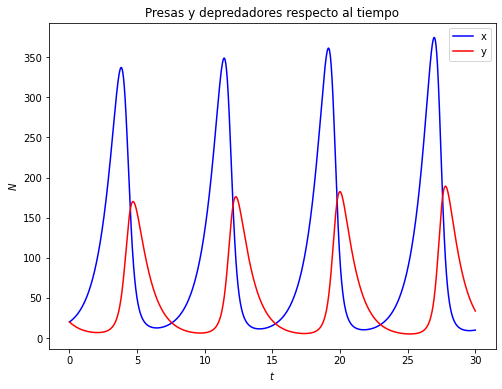

In [ ]:
t=np.arange(nt+1) * h

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(t, x, color='blue',linestyle='-', label='x')
ax.plot(t, y, color='red',linestyle='-', label='y')

ax.set_xlabel('$t$')
ax.set_ylabel('$N$')
ax.set_title('Presas y depredadores respecto al tiempo')
ax.legend()
graf1 = plt.show() 

Órbitas

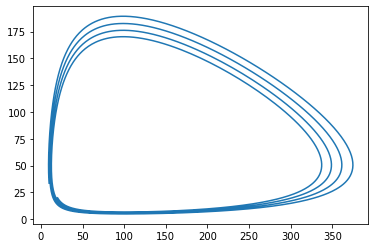

In [ ]:
plt.plot(x,y)

Resultados

In [ ]:
print('Función aproximada en x:',x)
print('Función aproximada en y:',y)

Función aproximada en x: [20.         20.12       20.24136384 ...  9.79170243  9.82247278
  9.85394745]
Función aproximada en y: [20.         19.84       19.68151808 ... 34.28753748 33.97823544
 33.67182811]


In [ ]:
print('Solución en t=',tf,':',x[nt])
print('Solución en t=',tf,':',y[nt])

Solución en t= 30.0 : 9.85394744856309
Solución en t= 30.0 : 33.67182811230629


**Método con "odeint"**

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(z,t):
    dxdt = z[0]-(b*z[0]*z[1])
    dydt = -z[1]+(d*z[0]*z[1])
    dzdt = [dxdt,dydt]
    return dzdt

# initial condition
z0 = [20,20]

# time points
t = np.linspace(0,30,100000)

# solve ODE
z = odeint(model,z0,t)


Gráficas respecto al tiempo

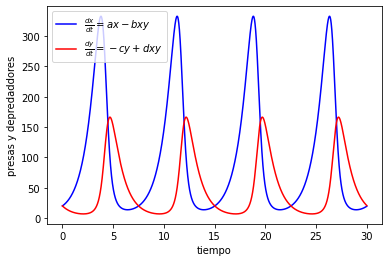

In [ ]:
# plot results
plt.plot(t,z[:,0],'b-',label=r'$\frac{dx}{dt}=ax-bxy$')
plt.plot(t,z[:,1],'r-',label=r'$\frac{dy}{dt}=-cy+dxy$')
plt.ylabel('presas y depredaddores')
plt.xlabel('tiempo')
plt.legend(loc='best')
graf2 = plt.show()

Órbitas

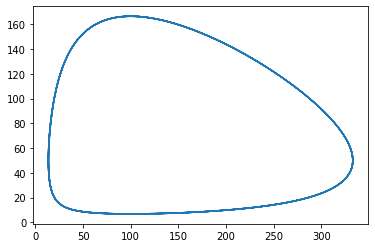

In [ ]:
plt.plot(z[:,0],z[:,1])

**Comparación de gráficas y órbitas**

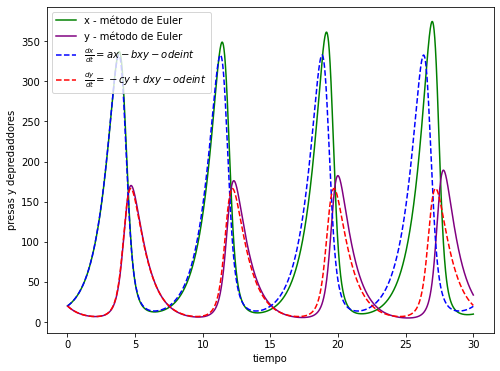

In [ ]:
t1=np.arange(nt+1) * h


fig, ax = plt.subplots(figsize=(8,6))
ax.plot(t1, x, color='green',linestyle='-', label='x - método de Euler')
ax.plot(t1, y, color='purple',linestyle='-', label='y - método de Euler')
plt.plot(t,z[:,0],'b--',label=r'$\frac{dx}{dt}=ax-bxy - odeint$')
plt.plot(t,z[:,1],'r--',label=r'$\frac{dy}{dt}=-cy+dxy - odeint$')
plt.ylabel('presas y depredaddores')
plt.xlabel('tiempo')
plt.legend(loc='best')
plt.show()

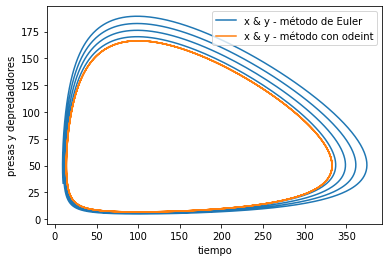

In [ ]:
plt.plot(x,y,label='x & y - método de Euler')
plt.plot(z[:,0],z[:,1],label='x & y - método con odeint')
plt.ylabel('presas y depredaddores')
plt.xlabel('tiempo')
plt.legend(loc='best')
plt.show()